In [ ]:
!pip install numpy
!pip install pandas
!pip install keras
!pip install matplotlib
!pip install scikit-learn

#### I collected the Ethereum Canada dataset for last 5 year starting Jan,2017 till Dec, 2022 and test dataset of the january month 2023 from 
ca.finance.yahoo.com

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_data= pd.read_csv("ETH-CAD-TRAIN.csv")
train_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,950.515625,981.918701,933.218445,970.050781,970.050781,3258976841
1,2018-01-02,969.680420,1147.471313,969.680420,1106.174072,1106.174072,7233235545
2,2018-01-03,1108.120239,1222.278931,1087.040161,1207.539673,1207.539673,6388350508
3,2018-01-04,1206.276611,1304.991333,1185.540405,1225.171631,1225.171631,8122071860
4,2018-01-05,1218.711792,1334.236450,1186.416870,1237.671631,1237.671631,8290447357
5,2018-01-06,1234.488525,1315.810669,1233.828613,1292.204102,1292.204102,5783483632
6,2018-01-07,1293.853882,1429.123657,1293.853882,1429.123657,1429.123657,6902752363
7,2018-01-08,1435.431641,1570.866577,1262.645264,1425.900024,1425.900024,10491879394
8,2018-01-09,1422.759033,1645.412720,1422.240356,1621.295654,1621.295654,9936114764
9,2018-01-10,1622.044067,1766.197266,1536.684448,1573.667969,1573.667969,11547254346


In [4]:
test_data= pd.read_csv("ETH-CAD-TEST.csv")
test_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01,1623.880615,1631.383057,1618.685913,1625.373779,1625.373779,3247695539
1,2023-01-02,1625.561157,1656.265747,1616.793701,1647.529907,1647.529907,5107780682
2,2023-01-03,1647.648438,1653.166504,1652.023560,1660.974365,1660.974365,4639231152
3,2023-01-04,1660.891968,1707.519165,1657.093994,1694.551758,1694.551758,8636996622
4,2023-01-05,1694.495117,1696.957153,1686.806030,1695.988525,1695.988525,5427682997
5,2023-01-06,1696.016357,1710.864380,1694.184937,1707.251343,1707.251343,6694156142
6,2023-01-07,1707.306030,1708.891235,1697.691528,1700.380371,1700.380371,3450083961
7,2023-01-08,1700.261475,1729.761841,1694.942017,1729.761841,1729.761841,4696179702
8,2023-01-09,1729.884521,1794.536621,1729.433960,1770.115479,1770.115479,10702673426
9,2023-01-10,1769.923340,1802.460815,1767.363037,1795.667358,1795.667358,7832680350


Train Data


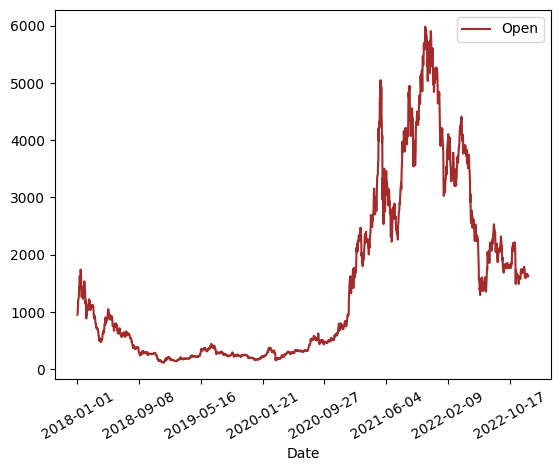


Test Data


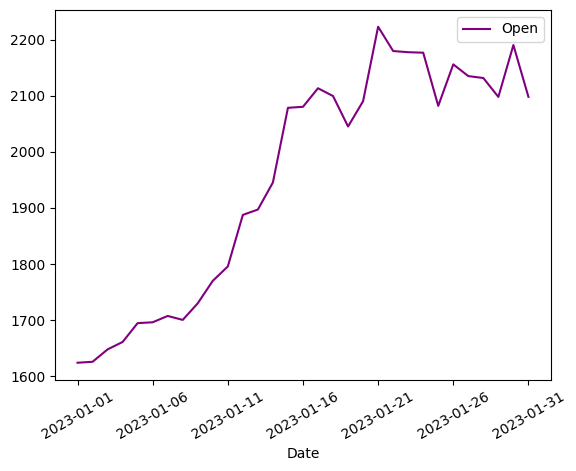

In [5]:
print("Train Data")
df = pd.DataFrame(train_data, columns=["Date", "Open"])
df.plot.line(x='Date',y='Open',c='brown')
plt.xticks(rotation=30)
plt.show()

print("\nTest Data")
df1 = pd.DataFrame(test_data, columns=["Date", "Open"])
df1.plot.line(x='Date',y='Open',c='purple')
plt.xticks(rotation=30)
plt.show()

In [6]:
training_set = train_data.iloc[:, 1:2].values
print(training_set)

[[ 950.515625]
 [ 969.68042 ]
 [1108.120239]
 ...
 [1618.529297]
 [1628.638672]
 [1627.464478]]


In [7]:
#feature scaling - Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, 1826):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [11]:
regressor = Sequential()

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [16]:
regressor.add(Dense(units = 1))

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
56/56 [==============================] - 28s 162ms/step - loss: 0.0148
Epoch 2/100
56/56 [==============================] - 9s 160ms/step - loss: 0.0044
Epoch 3/100
56/56 [==============================] - 9s 161ms/step - loss: 0.0043
Epoch 4/100
56/56 [==============================] - 9s 161ms/step - loss: 0.0038
Epoch 5/100
56/56 [==============================] - 9s 163ms/step - loss: 0.0046
Epoch 6/100
56/56 [==============================] - 9s 165ms/step - loss: 0.0033
Epoch 7/100
56/56 [==============================] - 9s 163ms/step - loss: 0.0031
Epoch 8/100
56/56 [==============================] - 9s 163ms/step - loss: 0.0027
Epoch 9/100
56/56 [==============================] - 9s 161ms/step - loss: 0.0030
Epoch 10/100
56/56 [==============================] - 9s 162ms/step - loss: 0.0035
Epoch 11/100
56/56 [==============================] - 9s 162ms/step - loss: 0.0025
Epoch 12/100
56/56 [==============================] - 9s 162ms/step - loss: 0.0024
Epoch 13/100

56/56 [==============================] - 11s 204ms/step - loss: 9.9499e-04
Epoch 100/100
56/56 [==============================] - 12s 206ms/step - loss: 0.0011


In [19]:
real_stock_price = test_data.iloc[:, 1:2].values


In [33]:
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 115ms/step


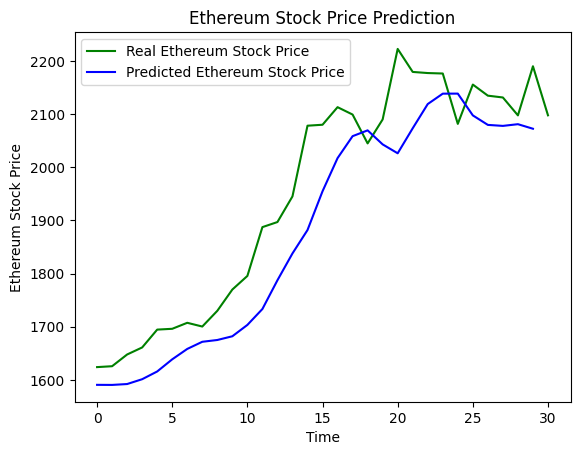

In [35]:
plt.plot(real_stock_price, color = 'green', label = 'Real Ethereum Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Ethereum Stock Price')
plt.title('Ethereum Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ethereum Stock Price')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(train_data, columns=["Date", "Open"])
df.plot(x="Date", y="Open", kind="line", figsize=(6, 4), c='black')
plt.xticks(rotation=30)
plt.show()
print("    The line shows the changes in prices over the course of 5 years")